# 1.2.2 Stpeest gradient descent
Question A
$
J = E(e^2[k])=E\left\{\left(y[k]-\underline{w}^{t} \cdot \underline{x}[k]\right) \cdot\left(y[k]-\underline{x}^{t}[k] \cdot \underline{w}\right)\right\} \\
=E\left\{y^{2}[k]\right\}-\underline{w}^{t} E\{\underline{x}[k] y[k]\}-E\left\{e[k] \underline{x}^{t}[k]\right\} \underline{w}+\underline{w}^{t} E\left\{\underline{x}[k] \underline{x}^{t}[k]\right\} \underline{w} \\
=E\left\{y^{2}[k]\right\}-\underline{w}^{t} \underline{r}_{y x}-\underline{r}_{y x}^{t} \underline{w}+\underline{w}^{t} R_{x} \underline{w}
$

$\mathbf{R}_{x}=\left(\begin{array}{ccc}
5 & -1 & -2 \\
-1 & 5 & -1 \\
-2 & -1 & 5 
\end{array}\right) ; \underline{\mathbf{r}}_{y x}=\left(\begin{array}{c}
1 \\
5.3 \\
-3.9
\end{array}\right)$
So $\underline{\mathbf{w}}_{0}= \left(\begin{array}{c}
0.2 &
1 &
-0.5
\end{array}\right)
$



Data csv file 
          X        Y
0  0.00000  0.34438
1 -1.10410 -0.17451
2  0.31334 -0.66892
3 -0.88409 -0.14649
4 -1.96720 -0.82132
The weight optimum - Wiener filter (from the normal equation)= is [ 0.2  1.  -0.5]


<AxesSubplot:xlabel='X', ylabel='Y'>

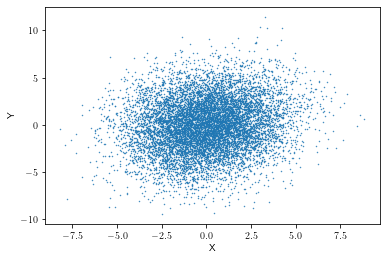

In [2]:
import pandas as pd
import os 
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['text.usetex'] = True

# os.path.abspath('')
ROOT_DIR = os.path.dirname(os.path.abspath(''))
DATA_PATH = os.path.join(ROOT_DIR, "1A")
DATA_PATH = os.path.join(DATA_PATH, "Assignment1") # 2 layers folders
csv_path = os.path.join(DATA_PATH, "assignment1_data.csv")
df = pd.read_csv(csv_path,names= ['X','Y']) # read csv data file
print(f'Data csv file \n',df.head(5))

# data input 
Rx = np.array([[5,-1,-2],[-1,5,-1],[-2,-1,5]])
Inv_Rx = np.linalg.inv(Rx)                        # inverse fo the Rx
Ryx = np.array([1,5.2,-3.9])                      # givene Ryx
wo = np.inner(Ryx,Inv_Rx)                         # weight optimum
for i in range(0,len(wo)): wo[i] = round(wo[i],1) # Rounded for the digit
print(f'The weight optimum - Wiener filter (from the normal equation)= is {wo}')

df.plot.scatter(x=0,y=1,s=0.2)                    # plot the data points in scatter

## Stpeest Gradient Descent
From the gradient algorithm, we know that 
$
\underline{\Triangle} = -2 (\underline{r}_{yx} - \mathcal{R})
$

With the algorithm $
\underline{\mathrm{w}}[k+1]=\underline{\mathrm{w}}[k]+2 \alpha\left(\underline{r}_{y x}-\mathrm{R}_{x} \underline \cdot {\mathrm{w}}[k]\right)
$
Usually, the $\underline{w}[0]$ is 0. (In slide)
And learning rate would be stable if and only if the $$0< \alpha < \frac{1}{7}$$

In [3]:


def GD_iter(inter_n,w_f,Learn_rt,Ryx,Rx):
    for n in range(0,inter_n):
        w_f[n] = w_f[n-1] + 2 * Learn_rt * (Ryx - np.dot(Rx,w_f[n-1])) # update algorithm in GD
        if np.sum(w_f[n]-w_f[n-1])==0:
            print('Iteration',n,w_f[n])
            break

    return (n,w_f[0:n])

#initialize weights with 0
w_f = np.zeros((len(df),3))                                            
inter_n = len(df)
# smooth learn rate
Learn_rt = 1/80                  
n,w_fn = GD_iter(inter_n = inter_n,w_f=w_f,Learn_rt=Learn_rt,Ryx=Ryx,Rx=Rx)

# not smooth learn rate
Learn_rt_2 = 1/8                  
w_f = np.zeros((len(df),3))
n2,w_fn2 = GD_iter(inter_n = inter_n,w_f=w_f,Learn_rt=Learn_rt_2,Ryx=Ryx,Rx=Rx)

# Round
for i in range(0,len(w_fn[1,:])): w_fn[1,:][i] = round(w_fn[1,:][i],2)
for i in range(0,len(w_fn2[1,:])): w_fn2[1,:][i] = round(w_fn2[1,:][i],2)

print(w_fn2[1,:],n2,'\n')
print('\n',w_fn[1,:],n)

Iteration 576 [ 0.19230769  0.97692308 -0.50769231]
Iteration 51 [ 0.19230758  0.97692308 -0.5076922 ]
[ 0.03  0.79 -0.28] 51 


 [ 0.05  0.24 -0.18] 576


From the $J_{ls}$ function above, we know that the equation can rewrite as below:
$$
\begin{equation}
    J_{ls} = y^ty+w^t R_{x}w+-w^tr_{yx}-r^t_{yx}w
\end{equation}
$$

$$
w^t R_{x}w = \begin{bmatrix}
w_0 & w_1 & w_2 &
\end{bmatrix} 

\begin{bmatrix} 5 & -1& -2\\ -1& 5 &-1 \\ -2& -1 &5 
\end{bmatrix}
 \begin{bmatrix}
w_0 \\ w_1 \\ w_2 \\
\end{bmatrix} = 
5w_0^2+5w_1^2+5w_2^2-2w_1w_0-4w_0w_2-2w_1w_2
$$

And the part with 
$$
-w^tr_{yx}-r^t_{yx}w = 
\begin{bmatrix}
    2w_0 & -10.6w_1 & -7.8w_2\\
\end{bmatrix}
$$
So, the equation (1) would be:
    $$
    \begin{equation}
        J_{ls}=y^ty+ 5w_0^2+5w_1^2+5w_2^2-2w_1w_0-4w_0w_2-2w_1w_2-2w_0 - 10.6w_1 -7.8w_2
    \end{equation}
    $$
where we have $w_2=-0.5$

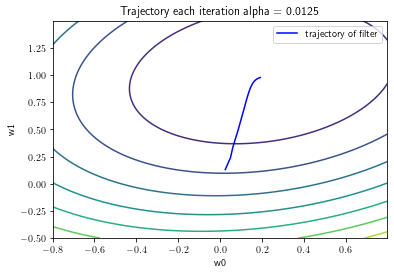

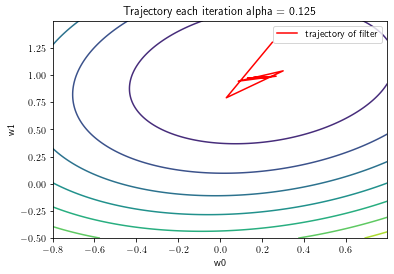

In [4]:
yty = np.dot(np.transpose(df['Y']),df['Y']) # return a constant

# w2 = -0.5
def Jls(w0,w1):
    # return 5*(w0**2)+5*(w1**2)+5*(-0.5**2)-2*w0*w1-9.6*w1 -7.8*0.5
    return (5*(w0**2)+5*(w1**2)+5*((-0.5)**2)-2*w1*w0-4*w0*(-0.5)-2*w1*(-0.5)-2*w0-10.6*w1-7.8*(-0.5))


w0,w1 = np.meshgrid(np.arange(-0.8,0.8,0.001),np.arange(-0.5,1.5,0.001))
# np.meshgrid(np.arange(-0.25,0.5,0.01),np.arange(0,1.5,0.01))

def Jls_GD(a,yy,data):
    return (yy/len(data)+a)

Jlos = Jls_GD(Jls(w0,w1),yty,df)


# smooth
plt.figure(1)
plt.contour(w0,w1,Jlos)
plt.plot(w_fn[:,0],w_fn[:,1],color='blue',label="trajectory of filter")
plt.legend()
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Trajectory each iteration alpha = 0.0125')
plt.savefig('Trajectory_smooth_1.2.1.png')

# not smooth
plt.figure(2)
plt.contour(w0,w1,Jlos)
plt.plot(w_fn2[:,0],w_fn2[:,1],color='red',label="trajectory of filter")
plt.legend()
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Trajectory each iteration alpha = 0.125')
plt.savefig('Trajectory_not_smooth_1.2.1.png')


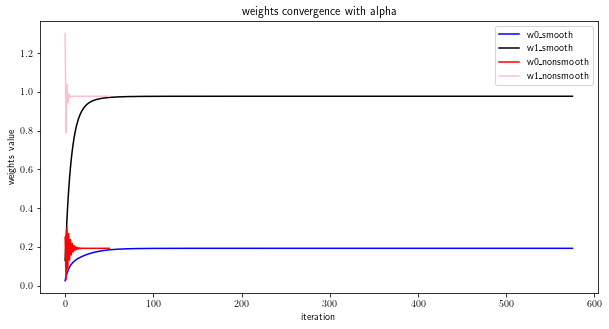

In [5]:
numb = len(w_fn)
numb2 = len(w_fn2)
t = np.arange(0,numb,1)
t2 = np.arange(0,numb2,1)
plt.figure(figsize=(10,5))
plt.plot(t,w_fn[:numb,0],color='blue',label='w0_smooth')
plt.plot(t,w_fn[:numb,1],color='black',label='w1_smooth')
plt.plot(t2,w_fn2[:numb2,0],color='red',label='w0_nonsmooth')
plt.plot(t2,w_fn2[:numb2,1],color='pink',label='w1_nonsmooth')

plt.xlabel('iteration')
plt.ylabel('weights value')
plt.title('weights convergence with alpha')
plt.legend()
# plt.savefig('1.2.2_all.png')

# 1.2.3 Newton method
Input coloration influences the performance of the GD algorithm. To solve this issue, the Newton algorithm performs pre-whitening of the input signals.
-  Show that Newton’s method makes all filter weights converge at the same rate.
-  For which α is Newton’s method stable?

$$
\begin{equation}
    \underline{d}[k]=(I-2\alpha R_x)^k\underline{d}[0] 
\end{equation}
$$
The solution of Newton is:
$$
\begin{equation}
    \underline{w}[k+1]=\underline{w}[k]-\alpha R_x^{-1}\underline{\bigtriangledown}
\end{equation}
$$
Where the gradient is specified as $\underline{\bigtriangledown}=-2(\underline{r_{yx}}-R_x\underline{w}[k]) $
Therefore, the Newton update rewrite for the convenience of coding.
$$
\begin{equation}
    \underline{w}[k+1]=\underline{w}[k]-\alpha R_x^{-1}(-2(\underline{r_{yx}}-R_x\underline{w}[k]))
\end{equation}
$$
It is worth to notice that the $R_xR_x^{-1}$ will be canceled out when together.
## i
From the figure, the Newton method converge in a style of staright line. Where the same $\alpha$ rate showing in a smooth curve. 

1327 [ 0.19230769  0.97692308 -0.50769231]


Text(0.5, 1.0, 'Trajectory each iteration using Newton')

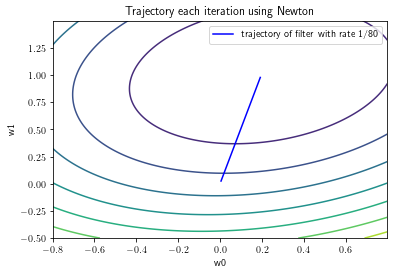

In [6]:
import matplotlib.pyplot as plt
w_f_newton = np.zeros((len(df),3))

Alpha = Learn_rt # Same as preivous rate

iter= len(df)
w0,w1 = np.meshgrid(np.arange(-0.8,0.8,0.001),np.arange(-0.5,1.5,0.001))
def NewtonIter(iter_n,wf,a,ryx,invrx):
    for n in range(0,iter_n):
        wf[n] = wf[n-1]-2*a*wf[n-1] + 2 * a * np.dot(invrx,ryx)
        

        if np.sum(wf[n]-wf[n-1])==0:
            print(n,wf[n])
            break
    return(n,wf[0:n])

newton,NTwf = NewtonIter(iter,w_f_newton,Alpha,Ryx,Inv_Rx)


JOS = Jls_GD(Jls(w0,w1),yty,df)

plt.figure(4)
plt.contour(w0,w1,JOS)
plt.plot(NTwf[:,0],NTwf[:,1],color='blue',label="trajectory of filter with rate 1/80")
plt.legend()
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Trajectory each iteration using Newton')
# plt.savefig('Trajectory_Newton.png')

# Unknown Statistics
## 1.3.1 LMS and NLMS
### j)
Implement LMS (Least Mean Squares) filter at each GD update iteration.
 - LMS $R_x = \underline{x}[k]\underline{x}^t[k]$ and $\underline{r}_{yx}=\underline{x}[k]y[k]$
 - $\underline{w}[k+1]=\underline{w}[k]+2\alpha\underline{x}[k]e[k]$

filter.w=filter.w+2*alpha*x*r;

9997 [ 0.208132    0.99560981 -0.50858244] -0.25371193742615805
9997 [ 0.16351687  1.05302646 -0.43241137] -0.25371193742615805


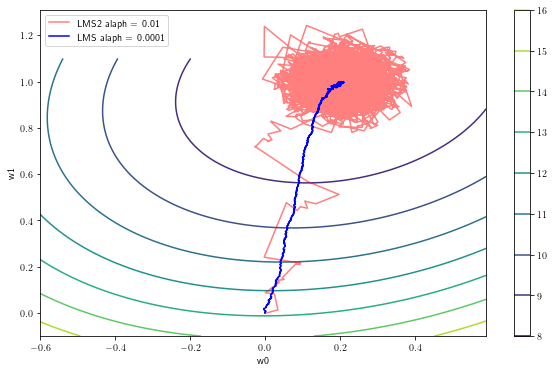

In [32]:
x1 = np.array([0,0])

# x=np.append(x1,df['X'])
x = df.iloc[:,0]
y = df.iloc[:,1]

# Alpha
# flag = 1
# for n in range(1,len(df)-2): 
#     X = np.array([x.iloc[n+2],x.iloc[n+1],x.iloc[n]])
#     Y = y.iloc[n+2]
#     e = Y - np.dot(w_f_LMS[n-1],X)
#     w_f_LMS[n] = w_f_LMS[n-1] + 2* (1e-4) * e * X
#     if np.abs(e)<1e-10 and flag:
#         print(e)
#         print(n)
#         flag = 0

# print(w_f_LMS[n])
def LMS(data,a):
    w_f_LMS = np.zeros((len(df)-2,3)) # where the N = 3
    for n in range(1,len(data)-2): 
        X = np.array([data['X'].iloc[n+2],data['X'].iloc[n+1],data['X'].iloc[n]])
        Y = data['Y'].iloc[n+2]
        e = Y - np.dot(w_f_LMS[n-1],X)
        w_f_LMS[n] = w_f_LMS[n-1] + 2*a*e*X
        if np.abs(e)<1e-10:
            print(e)
            print(n)
            break
    return(n,w_f_LMS[0:],e)

lms_1 = 0.0001
n_LMS,w_LMS,e = LMS(df,lms_1)
lms_2 = 0.01
n2_LMS,w2_LMS,e = LMS(df,lms_2)

print(n_LMS,w_LMS[n_LMS],e)
print(n2_LMS,w2_LMS[n_LMS],e)
W0,W1 = np.meshgrid(np.arange(-0.6,0.6,0.01),np.arange(-0.1,1.1,0.01))

J_LMS = Jls_GD(Jls(W0,W1),yty,df)

plt.figure(figsize=(10,6))
plt.contour(W0,W1,J_LMS)


plt.plot(w2_LMS[:,0],w2_LMS[:,1],color='red',label="LMS2 alaph = 0.01",alpha = 0.5)
plt.plot(w_LMS[:,0],w_LMS[:,1],color='blue',label="LMS alaph = 0.0001",alpha=1)
plt.legend()
plt.xlabel('w0')
plt.ylabel('w1')
plt.colorbar()
# plt.savefig('1.3.1_LMS_diff_a.png')
plt.show()

## 1.3.2 RLS
### m)
Implement the RLS update rule in python. Use $\gamma = 1-10^{-4}$ and include the plot of convergence of the filter coefficients.

### n) Compare the advantages
See in overleaf

In [ ]:
# RLS
